### Imagenet

Largest image classification dataset at this point of time.

Url: http://image-net.org/

Our setup: classify from a set of 1000 classes.

In [1]:
#classes' names are stored here
import pickle
classes = pickle.load(open('classes.pkl','rb'))
print (classes[::100])

['tench, Tinca tinca', 'black swan, Cygnus atratus', 'Tibetan terrier, chrysanthemum dog', 'tiger beetle', "academic gown, academic robe, judge's robe", 'cliff dwelling', 'hook, claw', 'paper towel', 'slot, one-armed bandit', 'water tower']


### TorchVision
PyTorch has several companion libraries, one of them being [torchvision](https://github.com/pytorch/vision/tree/master/) - it contains a number of popular vision datasets, preprocessing tools and most importantly, [pre-trained models](https://github.com/pytorch/vision/tree/master/torchvision/models).

For now, we're going to use torch Inception-v3 module.

In [7]:
!pip install torchvision
#if you're on GPU:
#!pip install torchvision --user
#import sys, os; sys.path.append("YOUR_HOME_PATH/.local/lib/YOUR_PYTHON_VERSION/site-packages")

  Using cached torchvision-0.2.0-py2.py3-none-any.whl


We're gonna use the inception-v3 network:
![img](https://hackathonprojects.files.wordpress.com/2016/09/googlenet_diagram.png?w=650&h=192)

Let's first look at the code here: [url](https://github.com/pytorch/vision/blob/master/torchvision/models/inception.py)

In [9]:
from torchvision.models.inception import inception_v3

model = inception_v3(pretrained=True,      # load existing weights
                     transform_input=True, # preprocess input image the same way as in training
                    )

model.aux_logits = False # don't predict intermediate logits (yellow layers at the bottom)
model.train(False)

In [14]:
import torch
from torch.autograd import Variable

dummy_x = Variable(torch.randn(5, 3, 299, 299))
model(dummy_x)

Variable containing:
-1.2163  0.9245  1.6692  ...  -1.6760 -0.8116  1.6953
-1.5444  0.6784  1.0346  ...  -1.4455 -0.9399  1.8123
-1.3075  0.7746  1.6786  ...  -1.6740 -1.1615  1.5805
-1.5320  0.6077  1.1581  ...  -1.4904 -1.1363  2.0780
-1.4900  0.9420  1.8473  ...  -1.6781 -0.8887  1.5680
[torch.FloatTensor of size 5x1000]

### Predict class probabilities

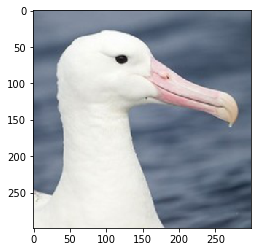

top-10 classes are:
40.2930	web site
33.5723	clog
33.5635	binoculars
32.4974	mixing bowl
30.1294	jigsaw puzzle
28.8754	flatworm
28.1356	saltshaker
26.4712	cradle
26.2353	pitcher


In [16]:
import matplotlib.pyplot as plt
from scipy.misc import imresize
%matplotlib inline

img = imresize(plt.imread('sample_images/albatross.jpg'), (299,299))
plt.imshow(img)
plt.show()

img = Variable(torch.FloatTensor(img.reshape(1, 3, 299, 299)))

probs = model(img)

probs = probs.data.numpy()

labels = probs.ravel().argsort()[-1:-10:-1]
print ('top-10 classes are:')
for l in labels:
    print ('%.4f\t%s' % (probs.ravel()[l], classes[l].split(',')[0]))



### Having fun with pre-trained nets

In [18]:
!wget http://cdn.com.do/wp-content/uploads/2017/02/Donal-Trum-Derogar.jpeg -O img.jpg

--2018-01-23 13:59:17--  http://cdn.com.do/wp-content/uploads/2017/02/Donal-Trum-Derogar.jpeg
Resolving cdn.com.do (cdn.com.do)... 104.25.143.118, 104.25.144.118, 2400:cb00:2048:1::6819:9076, ...
Connecting to cdn.com.do (cdn.com.do)|104.25.143.118|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 51048 (50K) [image/jpeg]
Saving to: 'img.jpg'

img.jpg             100%[===================>]  49.85K  --.-KB/s    in 0.1s    

2018-01-23 13:59:18 (360 KB/s) - 'img.jpg' saved [51048/51048]



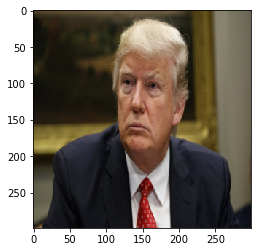

top-10 classes are:
24.2085	web site
18.9977	pitcher
18.7128	clog
17.3343	flatworm
16.0090	groom
14.9527	vase
14.8933	mixing bowl
14.0237	saltshaker
13.8571	spotlight


In [19]:
import matplotlib.pyplot as plt
from scipy.misc import imresize
%matplotlib inline

img = imresize(plt.imread('img.jpg'), (299,299))
plt.imshow(img)
plt.show()

img = Variable(torch.FloatTensor(img.reshape(1, 3, 299, 299)))
probs = model(img)
probs = probs.data.numpy()

labels = probs.ravel().argsort()[-1:-10:-1]
print ('top-10 classes are:')
for l in labels:
    print ('%.4f\t%s' % (probs.ravel()[l], classes[l].split(',')[0]))

